In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import newton


In [2]:
# Ticker symbols
tickers = ['TLT', 'IEF', 'SHY', 'BND']

# Fetch bond data
bonds_data = {ticker: yf.Ticker(ticker).info for ticker in tickers}

In [3]:
bonds_data

{'TLT': {'phone': '1-800-474-2737',
  'longBusinessSummary': 'The fund will invest at least 80% of its assets in the component securities of the underlying index, and it will invest at least 90% of its assets in U.S. Treasury securities that the advisor believes will help the fund track the underlying index. The underlying index measures the performance of public obligations of the U.S. Treasury that have a remaining maturity greater than or equal to twenty years.',
  'maxAge': 86400,
  'priceHint': 2,
  'previousClose': 98.73,
  'open': 98.23,
  'dayLow': 97.43,
  'dayHigh': 98.3,
  'regularMarketPreviousClose': 98.73,
  'regularMarketOpen': 98.23,
  'regularMarketDayLow': 97.43,
  'regularMarketDayHigh': 98.3,
  'forwardPE': -4887.5,
  'volume': 33414321,
  'regularMarketVolume': 33414321,
  'averageVolume': 37144982,
  'averageVolume10days': 29859010,
  'averageDailyVolume10Day': 29859010,
  'bid': 97.72,
  'ask': 97.76,
  'bidSize': 1600,
  'askSize': 100,
  'yield': 0.0375,
  'tot

In [4]:
# Function to calculate cash flows
def calculate_cash_flows(coupon_rate, face_value, years_to_maturity):
    coupon_payment = (coupon_rate / 100) * face_value
    cash_flows = [coupon_payment] * (years_to_maturity - 1) + [coupon_payment + face_value]
    return np.array(cash_flows)

In [5]:
# Function to calculate bond price
def calculate_bond_price(cash_flows, ytm, years_to_maturity):
    return np.sum([cf / (1 + ytm) ** t for t, cf in enumerate(cash_flows, start=1)])


In [6]:
# Function to find YTM
def find_ytm(cash_flows, market_price, years_to_maturity):
    def bond_price_diff(ytm):
        return calculate_bond_price(cash_flows, ytm, years_to_maturity) - market_price
    
    return newton(bond_price_diff, 0.05)


In [7]:
# Function to calculate Macaulay Duration
def macaulay_duration(cash_flows, ytm):
    discounted_cf = [cf / (1 + ytm) ** t for t, cf in enumerate(cash_flows, start=1)]
    duration = np.sum([t * cf for t, cf in enumerate(discounted_cf, start=1)]) / np.sum(discounted_cf)
    return duration

In [8]:
# Function to calculate Modified Duration
def modified_duration(macaulay_duration, ytm):
    return macaulay_duration / (1 + ytm)


In [9]:
# Sensitivity Analysis: Calculate the change in price due to a change in interest rate
def price_sensitivity(mod_duration, market_price, rate_change):
    return -mod_duration * market_price * rate_change

In [11]:
for ticker in tickers:
    bond_info = bonds_data[ticker]
    coupon_rate = bond_info.get('trailingAnnualDividendYield', 0)

In [12]:
print(coupon_rate)

0


In [10]:

# Analyze each bond
for ticker in tickers:
    bond_info = bonds_data[ticker]
    
    face_value = 1000  # Assuming a face value of $1000
    coupon_rate = bond_info.get('trailingAnnualDividendYield', 0)
    years_to_maturity = bond_info.get('term', 0) / 12  # Assuming term in months
    market_price = bond_info.get('regularMarketPrice', face_value)
    
    cash_flows = calculate_cash_flows(coupon_rate, face_value, int(years_to_maturity))
    ytm = bond_info.get('yield',0)
    
    # Calculate durations
    mac_dur = macaulay_duration(cash_flows, ytm)
    mod_dur = modified_duration(mac_dur, ytm)
    
    # Sensitivity Analysis for a 1% interest rate change
    rate_change = 0.01
    price_change = price_sensitivity(mod_dur, market_price, rate_change)
    
    print(f"Bond: {ticker}")
    print(f"Coupon Rate: {coupon_rate}%")
    print(f"Years to Maturity: {years_to_maturity}")
    print(f"Market Price: ${market_price:.2f}")
    print(f"Yield to Maturity: {ytm * 100:.2f}%")
    print(f"Cash Flows: {cash_flows}")
    print(f"Macaulay Duration: {mac_dur:.2f} years")
    print(f"Modified Duration: {mod_dur:.2f} years")
    print(f"Sensitivity Analysis (1% rate change): ${price_change:.2f}")
    print("-" * 30)


Bond: TLT
Coupon Rate: 0%
Years to Maturity: 0.0
Market Price: $1000.00
Yield to Maturity: 0.00%
Cash Flows: [1000.]
Macaulay Duration: 1.00 years
Modified Duration: 1.00 years
Sensitivity Analysis (1% rate change): $-10.00
------------------------------
Bond: IEF
Coupon Rate: 0%
Years to Maturity: 0.0
Market Price: $1000.00
Yield to Maturity: 0.00%
Cash Flows: [1000.]
Macaulay Duration: 1.00 years
Modified Duration: 1.00 years
Sensitivity Analysis (1% rate change): $-10.00
------------------------------
Bond: SHY
Coupon Rate: 0%
Years to Maturity: 0.0
Market Price: $1000.00
Yield to Maturity: 0.00%
Cash Flows: [1000.]
Macaulay Duration: 1.00 years
Modified Duration: 1.00 years
Sensitivity Analysis (1% rate change): $-10.00
------------------------------
Bond: BND
Coupon Rate: 0%
Years to Maturity: 0.0
Market Price: $1000.00
Yield to Maturity: 0.00%
Cash Flows: [1000.]
Macaulay Duration: 1.00 years
Modified Duration: 1.00 years
Sensitivity Analysis (1% rate change): $-10.00
-----------

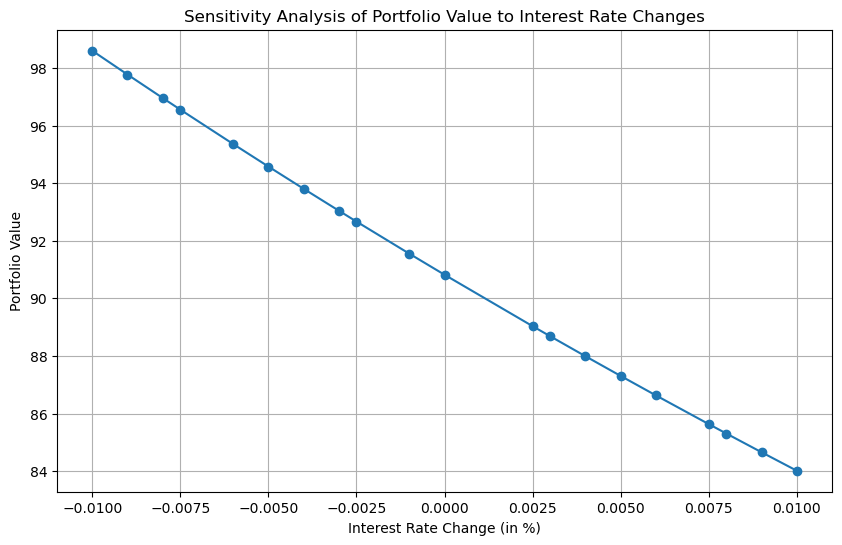

Optimal portfolio weights for target duration of 8 years: [0.21998804 0.21998804 0.34003587 0.21998804]
TLT: 0.22
IEF: 0.22
SHY: 0.34
BND: 0.22


In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define bond data
bond_data = {
    'TLT': {'price': 101.85, 'coupon_rate': 0.0225, 'maturity_years': 20},
    'IEF': {'price': 101.59, 'coupon_rate': 0.0175, 'maturity_years': 7},
    'SHY': {'price': 86.08, 'coupon_rate': 0.015, 'maturity_years': 3},
    'BND': {'price': 76.35, 'coupon_rate': 0.025, 'maturity_years': 10}
}

# Define a function to calculate the present value of a cash flow
def present_value(cf, r, t):
    return cf / (1 + r) ** t

# Calculate cash flows and yield to maturity (YTM)
def calculate_cash_flows_and_ytm(price, coupon_rate, maturity_years, face_value=100):
    cash_flows = [face_value * coupon_rate] * (maturity_years - 1) + [face_value * (1 + coupon_rate)]
    
    def price_error(ytm):
        return price - sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
    
    ytm = fsolve(price_error, 0.05)[0]
    return cash_flows, ytm

# Example calculations for each bond
bond_cash_flows = {}
bond_ytms = {}

for ticker, data in bond_data.items():
    cash_flows, ytm = calculate_cash_flows_and_ytm(data['price'], data['coupon_rate'], data['maturity_years'])
    bond_cash_flows[ticker] = cash_flows
    bond_ytms[ticker] = ytm

# Calculate duration
def calculate_duration(cash_flows, ytm):
    durations = [t * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_duration = sum(durations) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_duration

# Calculate convexity
def calculate_convexity(cash_flows, ytm):
    convexities = [t * (t + 1) * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_convexity = sum(convexities) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_convexity

# Duration Matching and Immunization
def duration_matching_and_immunization(target_duration):
    def portfolio_duration(weights):
        total_duration = sum(w * calculate_duration(bond_cash_flows[ticker], bond_ytms[ticker]) for w, ticker in zip(weights, bond_data.keys()))
        return total_duration
    
    def objective_function(weights):
        return (portfolio_duration(weights) - target_duration) ** 2
    
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w) - 1}]
    bounds = [(0, 1)] * len(bond_data)
    result = minimize(objective_function, [1/len(bond_data)] * len(bond_data), bounds=bounds, constraints=constraints)
    
    return result.x

target_duration = 8  # Example target duration
optimal_weights = duration_matching_and_immunization(target_duration)

# Sensitivity Analysis
def sensitivity_analysis(interest_rate_changes):
    portfolio_values = []
    for change in interest_rate_changes:
        adjusted_ytms = {ticker: ytm + change for ticker, ytm in bond_ytms.items()}
        portfolio_value = sum(optimal_weights[i] * sum(present_value(cf, adjusted_ytms[ticker], t) for t, cf in enumerate(bond_cash_flows[ticker], 1)) for i, ticker in enumerate(bond_data.keys()))
        portfolio_values.append(portfolio_value)
    return portfolio_values

# Example interest rate changes (in basis points)
interest_rate_changes = [-0.01,-0.0090,-0.0080,-0.0075,-0.006,-0.005,-0.004,-0.003,-0.0025,-0.0010, 0,0.0025,0.003,0.004, 0.005,0.006,0.0075,0.0080,0.0090, 0.01]
portfolio_values = sensitivity_analysis(interest_rate_changes)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_changes, portfolio_values, marker='o')
plt.title('Sensitivity Analysis of Portfolio Value to Interest Rate Changes')
plt.xlabel('Interest Rate Change (in %)')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()

# Display results
print(f"Optimal portfolio weights for target duration of {target_duration} years: {optimal_weights}")
for ticker, weight in zip(bond_data.keys(), optimal_weights):
    print(f"{ticker}: {weight:.2f}")


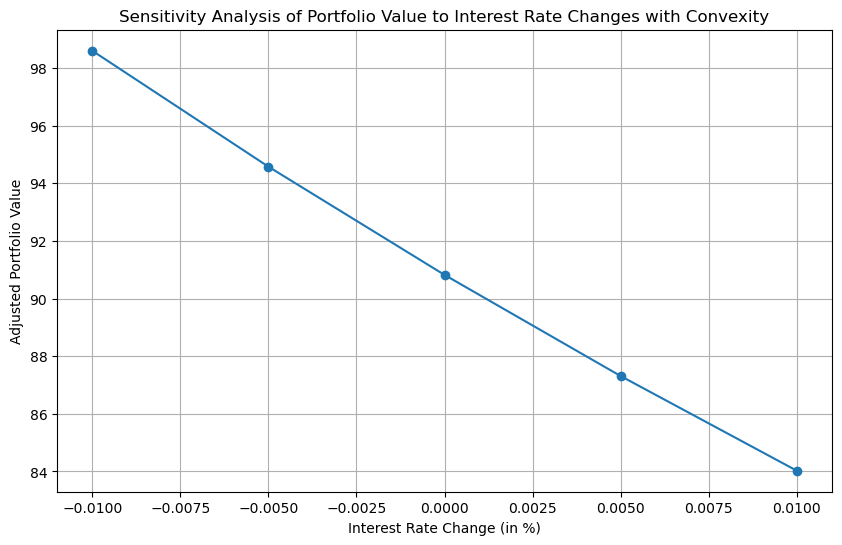

Optimal portfolio weights for target duration of 8 years: [0.21998804 0.21998804 0.34003587 0.21998804]
TLT: 0.22
IEF: 0.22
SHY: 0.34
BND: 0.22


In [4]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define bond data
bond_data = {
    'TLT': {'price': 101.85, 'coupon_rate': 0.0225, 'maturity_years': 20},
    'IEF': {'price': 101.59, 'coupon_rate': 0.0175, 'maturity_years': 7},
    'SHY': {'price': 86.08, 'coupon_rate': 0.015, 'maturity_years': 3},
    'BND': {'price': 76.35, 'coupon_rate': 0.025, 'maturity_years': 10}
}

# Define a function to calculate the present value of a cash flow
def present_value(cf, r, t):
    return cf / (1 + r) ** t

# Calculate cash flows and yield to maturity (YTM)
def calculate_cash_flows_and_ytm(price, coupon_rate, maturity_years, face_value=100):
    cash_flows = [face_value * coupon_rate] * (maturity_years - 1) + [face_value * (1 + coupon_rate)]
    
    def price_error(ytm):
        return price - sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
    
    ytm = fsolve(price_error, 0.05)[0]
    return cash_flows, ytm

# Example calculations for each bond
bond_cash_flows = {}
bond_ytms = {}
bond_durations = {}
bond_convexities = {}

for ticker, data in bond_data.items():
    cash_flows, ytm = calculate_cash_flows_and_ytm(data['price'], data['coupon_rate'], data['maturity_years'])
    bond_cash_flows[ticker] = cash_flows
    bond_ytms[ticker] = ytm
    bond_durations[ticker] = calculate_duration(cash_flows, ytm)
    bond_convexities[ticker] = calculate_convexity(cash_flows, ytm)

# Calculate duration
def calculate_duration(cash_flows, ytm):
    durations = [t * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_duration = sum(durations) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_duration

# Calculate convexity
def calculate_convexity(cash_flows, ytm):
    convexities = [t * (t + 1) * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_convexity = sum(convexities) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_convexity

# Duration Matching and Immunization
def duration_matching_and_immunization(target_duration):
    def portfolio_duration(weights):
        total_duration = sum(w * bond_durations[ticker] for w, ticker in zip(weights, bond_data.keys()))
        return total_duration
    
    def objective_function(weights):
        return (portfolio_duration(weights) - target_duration) ** 2
    
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w) - 1}]
    bounds = [(0, 1)] * len(bond_data)
    result = minimize(objective_function, [1/len(bond_data)] * len(bond_data), bounds=bounds, constraints=constraints)
    
    return result.x

target_duration = 8  # Example target duration
optimal_weights = duration_matching_and_immunization(target_duration)

# Sensitivity Analysis including Convexity
def sensitivity_analysis_with_convexity(interest_rate_changes):
    portfolio_values = []
    for change in interest_rate_changes:
        # Adjusted yields
        adjusted_ytms = {ticker: bond_ytms[ticker] + change for ticker in bond_data.keys()}
        
        # Calculate bond prices with adjusted yields
        prices_with_adjusted_ytms = []
        for i, ticker in enumerate(bond_data.keys()):
            cash_flows = bond_cash_flows[ticker]
            ytm = adjusted_ytms[ticker]
            price_with_adjusted_ytm = sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
            prices_with_adjusted_ytms.append(price_with_adjusted_ytm)
        
        # Calculate the portfolio value with adjusted bond prices
        portfolio_value = sum(optimal_weights[i] * prices_with_adjusted_ytms[i] for i in range(len(bond_data)))
        
        # Apply convexity adjustment
        convexity_adjustments = [optimal_weights[i] * bond_convexities[ticker] for i, ticker in enumerate(bond_data.keys())]
        convexity_adjustment = sum(convexity_adjustments)
        adjusted_value = portfolio_value + (0.5 * convexity_adjustment * change**2)
        
        portfolio_values.append(adjusted_value)
    
    return portfolio_values


# Example interest rate changes (in decimal form, e.g., 0.01 for 1%)
interest_rate_changes = [-0.01, -0.005, 0, 0.005, 0.01]
portfolio_values_with_convexity = sensitivity_analysis_with_convexity(interest_rate_changes)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_changes, portfolio_values_with_convexity, marker='o')
plt.title('Sensitivity Analysis of Portfolio Value to Interest Rate Changes with Convexity')
plt.xlabel('Interest Rate Change (in %)')
plt.ylabel('Adjusted Portfolio Value')
plt.grid(True)
plt.show()

# Display results
print(f"Optimal portfolio weights for target duration of {target_duration} years: {optimal_weights}")
for ticker, weight in zip(bond_data.keys(), optimal_weights):
    print(f"{ticker}: {weight:.2f}")


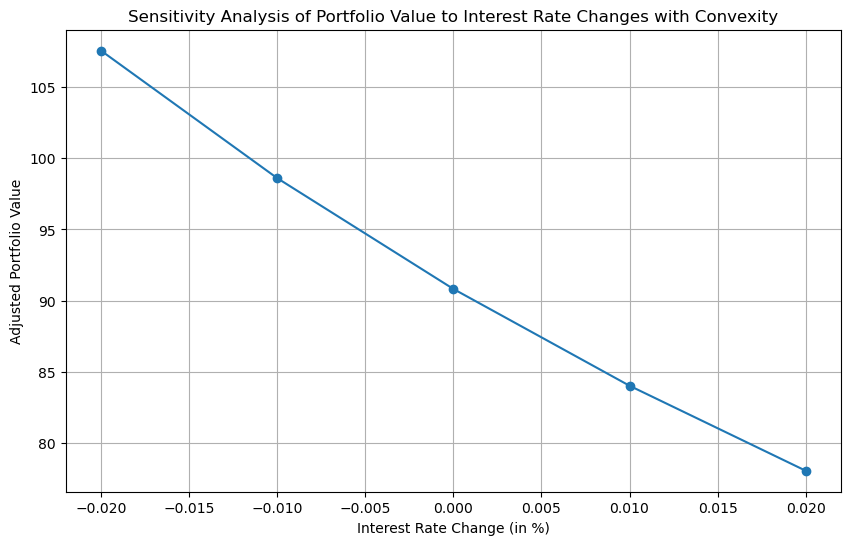

Optimal portfolio weights for target duration of 8 years: [0.21998804 0.21998804 0.34003587 0.21998804]
TLT: 0.22
IEF: 0.22
SHY: 0.34
BND: 0.22


In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define bond data
bond_data = {
    'TLT': {'price': 101.85, 'coupon_rate': 0.0225, 'maturity_years': 20},
    'IEF': {'price': 101.59, 'coupon_rate': 0.0175, 'maturity_years': 7},
    'SHY': {'price': 86.08, 'coupon_rate': 0.015, 'maturity_years': 3},
    'BND': {'price': 76.35, 'coupon_rate': 0.025, 'maturity_years': 10}
}

# Define a function to calculate the present value of a cash flow
def present_value(cf, r, t):
    return cf / (1 + r) ** t

# Calculate cash flows and yield to maturity (YTM)
def calculate_cash_flows_and_ytm(price, coupon_rate, maturity_years, face_value=100):
    cash_flows = [face_value * coupon_rate] * (maturity_years - 1) + [face_value * (1 + coupon_rate)]
    
    def price_error(ytm):
        return price - sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
    
    ytm = fsolve(price_error, 0.05)[0]
    return cash_flows, ytm

# Calculate duration
def calculate_duration(cash_flows, ytm):
    durations = [t * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_duration = sum(durations) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_duration

# Calculate convexity
def calculate_convexity(cash_flows, ytm):
    convexities = [t * (t + 1) * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_convexity = sum(convexities) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_convexity

# Calculate bond data
bond_cash_flows = {}
bond_ytms = {}
bond_durations = {}
bond_convexities = {}

for ticker, data in bond_data.items():
    cash_flows, ytm = calculate_cash_flows_and_ytm(data['price'], data['coupon_rate'], data['maturity_years'])
    bond_cash_flows[ticker] = cash_flows
    bond_ytms[ticker] = ytm
    bond_durations[ticker] = calculate_duration(cash_flows, ytm)
    bond_convexities[ticker] = calculate_convexity(cash_flows, ytm)

# Duration Matching and Immunization
def duration_matching_and_immunization(target_duration):
    def portfolio_duration(weights):
        total_duration = sum(w * bond_durations[ticker] for w, ticker in zip(weights, bond_data.keys()))
        return total_duration
    
    def objective_function(weights):
        return (portfolio_duration(weights) - target_duration) ** 2
    
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w) - 1}]
    bounds = [(0, 1)] * len(bond_data)
    result = minimize(objective_function, [1/len(bond_data)] * len(bond_data), bounds=bounds, constraints=constraints)
    
    return result.x

target_duration = 8  # Example target duration
optimal_weights = duration_matching_and_immunization(target_duration)

# Sensitivity Analysis including Convexity
def sensitivity_analysis_with_convexity(interest_rate_changes):
    portfolio_values = []
    for change in interest_rate_changes:
        # Adjusted yields
        adjusted_ytms = {ticker: bond_ytms[ticker] + change for ticker in bond_data.keys()}
        
        # Calculate bond prices with adjusted yields
        prices_with_adjusted_ytms = []
        for i, ticker in enumerate(bond_data.keys()):
            cash_flows = bond_cash_flows[ticker]
            ytm = adjusted_ytms[ticker]
            price_with_adjusted_ytm = sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
            prices_with_adjusted_ytms.append(price_with_adjusted_ytm)
        
        # Calculate the portfolio value with adjusted bond prices
        portfolio_value = sum(optimal_weights[i] * prices_with_adjusted_ytms[i] for i in range(len(bond_data)))
        
        # Apply convexity adjustment
        convexity_adjustments = [optimal_weights[i] * bond_convexities[ticker] for i, ticker in enumerate(bond_data.keys())]
        convexity_adjustment = sum(convexity_adjustments)
        adjusted_value = portfolio_value + (0.5 * convexity_adjustment * change**2)
        
        portfolio_values.append(adjusted_value)
    
    return portfolio_values

# Example interest rate changes (in decimal form, e.g., 0.01 for 1%)
interest_rate_changes = [-0.02, -0.01, 0, 0.01, 0.02]
portfolio_values_with_convexity = sensitivity_analysis_with_convexity(interest_rate_changes)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_changes, portfolio_values_with_convexity, marker='o')
plt.title('Sensitivity Analysis of Portfolio Value to Interest Rate Changes with Convexity')
plt.xlabel('Interest Rate Change (in %)')
plt.ylabel('Adjusted Portfolio Value')
plt.grid(True)
plt.show()

# Display results
print(f"Optimal portfolio weights for target duration of {target_duration} years: {optimal_weights}")
for ticker, weight in zip(bond_data.keys(), optimal_weights):
    print(f"{ticker}: {weight:.2f}")


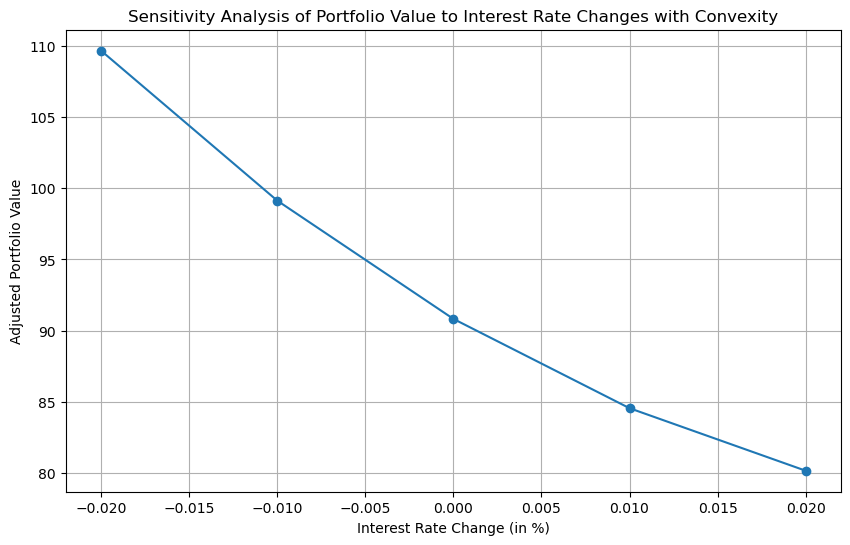

Optimal portfolio weights for target duration of 8 years: [0.21998804 0.21998804 0.34003587 0.21998804]
TLT: 0.22
IEF: 0.22
SHY: 0.34
BND: 0.22


In [6]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define bond data
bond_data = {
    'TLT': {'price': 101.85, 'coupon_rate': 0.0225, 'maturity_years': 20},
    'IEF': {'price': 101.59, 'coupon_rate': 0.0175, 'maturity_years': 7},
    'SHY': {'price': 86.08, 'coupon_rate': 0.015, 'maturity_years': 3},
    'BND': {'price': 76.35, 'coupon_rate': 0.025, 'maturity_years': 10}
}

# Define a function to calculate the present value of a cash flow
def present_value(cf, r, t):
    return cf / (1 + r) ** t

# Calculate cash flows and yield to maturity (YTM)
def calculate_cash_flows_and_ytm(price, coupon_rate, maturity_years, face_value=100):
    cash_flows = [face_value * coupon_rate] * (maturity_years - 1) + [face_value * (1 + coupon_rate)]
    
    def price_error(ytm):
        return price - sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
    
    ytm = fsolve(price_error, 0.05)[0]
    return cash_flows, ytm

# Calculate duration
def calculate_duration(cash_flows, ytm):
    durations = [t * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_duration = sum(durations) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_duration

# Calculate convexity
def calculate_convexity(cash_flows, ytm):
    convexities = [t * (t + 1) * present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)]
    total_convexity = sum(convexities) / sum([present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1)])
    return total_convexity

# Calculate bond data
bond_cash_flows = {}
bond_ytms = {}
bond_durations = {}
bond_convexities = {}

for ticker, data in bond_data.items():
    cash_flows, ytm = calculate_cash_flows_and_ytm(data['price'], data['coupon_rate'], data['maturity_years'])
    bond_cash_flows[ticker] = cash_flows
    bond_ytms[ticker] = ytm
    bond_durations[ticker] = calculate_duration(cash_flows, ytm)
    bond_convexities[ticker] = calculate_convexity(cash_flows, ytm)

# Duration Matching and Immunization
def duration_matching_and_immunization(target_duration):
    def portfolio_duration(weights):
        total_duration = sum(w * bond_durations[ticker] for w, ticker in zip(weights, bond_data.keys()))
        return total_duration
    
    def objective_function(weights):
        return (portfolio_duration(weights) - target_duration) ** 2
    
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w) - 1}]
    bounds = [(0, 1)] * len(bond_data)
    result = minimize(objective_function, [1/len(bond_data)] * len(bond_data), bounds=bounds, constraints=constraints)
    
    return result.x

target_duration = 8  # Example target duration
optimal_weights = duration_matching_and_immunization(target_duration)

# Sensitivity Analysis including Convexity
def sensitivity_analysis_with_convexity(interest_rate_changes):
    portfolio_values = []
    for change in interest_rate_changes:
        # Adjusted yields
        adjusted_ytms = {ticker: bond_ytms[ticker] + change for ticker in bond_data.keys()}
        
        # Calculate bond prices with adjusted yields
        prices_with_adjusted_ytms = []
        for i, ticker in enumerate(bond_data.keys()):
            cash_flows = bond_cash_flows[ticker]
            ytm = adjusted_ytms[ticker]
            price_with_adjusted_ytm = sum(present_value(cf, ytm, t) for t, cf in enumerate(cash_flows, 1))
            prices_with_adjusted_ytms.append(price_with_adjusted_ytm)
        
        # Calculate the portfolio value with adjusted bond prices
        portfolio_value = sum(optimal_weights[i] * prices_with_adjusted_ytms[i] for i in range(len(bond_data)))
        
        # Apply convexity adjustment
        convexity_adjustments = [optimal_weights[i] * bond_convexities[ticker] for i, ticker in enumerate(bond_data.keys())]
        convexity_adjustment = sum(convexity_adjustments)
        adjusted_value = portfolio_value + (0.5 * convexity_adjustment * (change ** 2) * 100)
        
        portfolio_values.append(adjusted_value)
    
    return portfolio_values

# Example interest rate changes (in decimal form, e.g., 0.01 for 1%)
interest_rate_changes = [-0.02, -0.01, 0, 0.01, 0.02]
portfolio_values_with_convexity = sensitivity_analysis_with_convexity(interest_rate_changes)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(interest_rate_changes, portfolio_values_with_convexity, marker='o')
plt.title('Sensitivity Analysis of Portfolio Value to Interest Rate Changes with Convexity')
plt.xlabel('Interest Rate Change (in %)')
plt.ylabel('Adjusted Portfolio Value')
plt.grid(True)
plt.show()

# Display results
print(f"Optimal portfolio weights for target duration of {target_duration} years: {optimal_weights}")
for ticker, weight in zip(bond_data.keys(), optimal_weights):
    print(f"{ticker}: {weight:.2f}")



In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Replace these with your actual data
interest_rate_changes = np.array(interest_rate_changes).reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(interest_rate_changes, portfolio_values_with_convexity)

# Calculate R-squared value
r_squared = model.score(interest_rate_changes, portfolio_values_with_convexity)

# Print R-squared value
print(f"R-squared value of the linear fit: {r_squared:.4f}")


R-squared value of the linear fit: 0.9737
